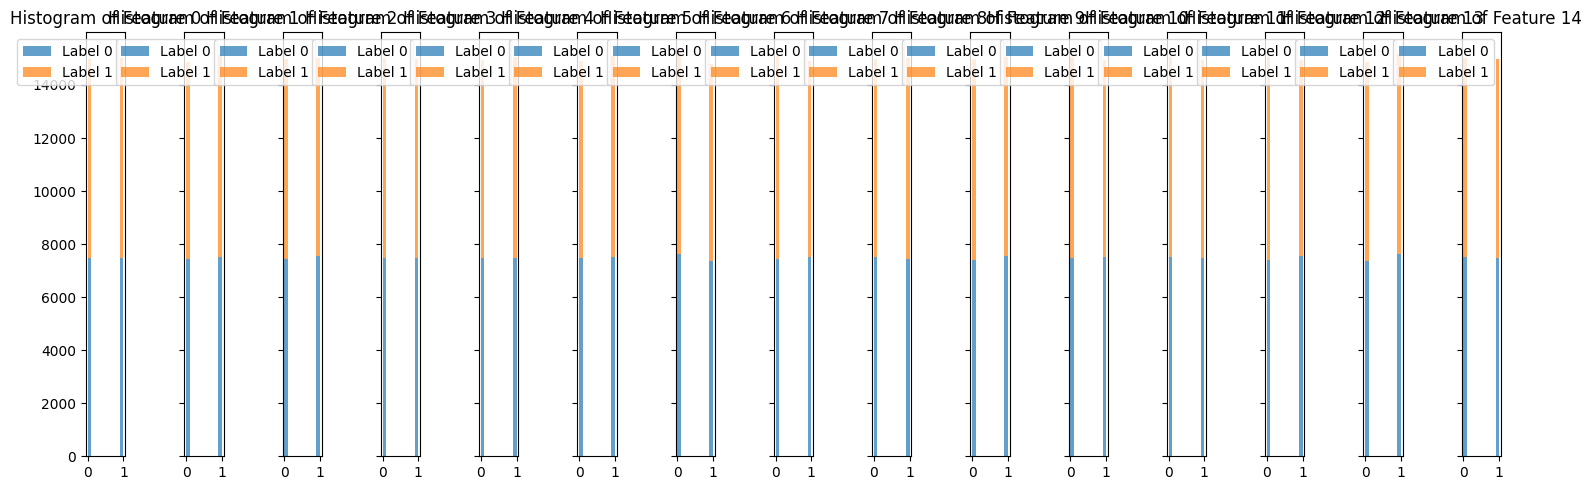

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
Xs = np.load("Datasets/kryptonite-15-X.npy")
Ys = np.load("Datasets/kryptonite-15-y.npy")
df_x = pd.DataFrame(Xs)
df_y = pd.DataFrame(Ys)

# Apply binary threshold to data in df_x
for c in df_x.columns:
    df_x[c] = df_x[c].apply(lambda x: 0 if x < 0.5 else 1)

# Define unique label colors
unique_labels = df_y[0].unique()
colors = plt.cm.tab10(range(len(unique_labels)))  # Assign a color for each unique label

# Plot stacked histograms with label-based color splits
fig, axes = plt.subplots(nrows=1, ncols=len(df_x.columns), figsize=(15, 5), sharey=True)
for i, col in enumerate(df_x.columns):
    # Prepare data for each label within the current feature
    data = [df_x[df_y[0] == label][col] for label in unique_labels]
    
    # Plot stacked histogram for the current feature
    axes[i].hist(data, bins=10, stacked=True, color=colors, label=[f'Label {label}' for label in unique_labels], alpha=0.7)
    axes[i].set_title(f'Histogram of Feature {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load datasets and initialize models
for n in [9, 12, 15]:
    # Load dataset
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.utils import to_categorical

    Xs = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.Series(Ys)  # Use Series if Ys is 1D

    # Convert labels to categorical one-hot encoding
    df_y = to_categorical(df_y)
    
    # Apply binary threshold to data in df_x
    df_x = (df_x >= 0.5).astype(int)  # Vectorized binary threshold

    # Split data
   
    print(f"Accuracy of the XGBoost Classifier on test set for n = {n}: {accuracy_xgb:.4f}")
    print(classification_report(y_test, y_pred_xgb))


*Best Model:*


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load datasets and initialize models
for n in [24]:
    # Load dataset
    import os
    print("Current Directory:", os.getcwd())
    Xs = np.load(f"/home/moritz/maths-for-ml/Kryptonite-N/Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"/home/moritz/maths-for-ml/Kryptonite-N/Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.Series(Ys)  # Use Series if Ys is 1D
    
    # Apply binary threshold to data in df_x
    df_x = (df_x >= 0.5).astype(int)  # Vectorized binary threshold

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

    # Build the neural network model
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Set up early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Set high epoch count; early stopping will halt if no improvement
        batch_size=32,
        validation_split=0.3, 
        verbose=1
    )

    # Make predictions and evaluate
    y_pred_nn = (model.predict(X_test) > 0.5).astype(int)  # Threshold predictions at 0.5
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    print(f"Accuracy of the Neural Network Classifier on test set for n = {n}: {accuracy_nn:.4f}")
    print(classification_report(y_test, y_pred_nn))


Current Directory: /home/moritz
Epoch 1/100


/home/moritz/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4965 - loss: 0.6942 - val_accuracy: 0.5029 - val_loss: 0.6932
Epoch 2/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5069 - val_loss: 0.6931
Epoch 3/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4962 - val_loss: 0.6936
Epoch 4/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5176 - loss: 0.6923 - val_accuracy: 0.4988 - val_loss: 0.6934
Epoch 5/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5179 - loss: 0.6921 - val_accuracy: 0.5001 - val_loss: 0.6944
Epoch 6/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5247 - loss: 0.6908 - val_accuracy: 0.4995 - val_loss: 0.6949
Epoch 7/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5273 - loss: 0.6896 - val_accuracy: 0.4945 - val_loss: 0.6949
Epoch 8/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5319 - loss: 0.6886 - val_accuracy: 0.5006

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


# Load datasets
for n in [9,12,15,18,24,30,45]:
    Xs = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.DataFrame(Ys)

    # Apply binary threshold to data in df_x
    for c in df_x.columns:
        df_x[c] = df_x[c].apply(lambda x: 0 if x < 0.5 else 1)

    # Perform PCA to reduce to 9 features
    print(len(df_x), len(df_x.columns))
    
    kpca = KernelPCA(kernel='rbf', n_components=9)
   
    df_x_reduced = kpca.fit_transform(df_x)
    print(df_x_reduced.shape)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_x_reduced, df_y, test_size=0.3, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
    rf_classifier.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy of the Random Forest Classifier for n = {n}:", accuracy)


18000 9
(18000, 9)
Accuracy of the Random Forest Classifier for n = 9: 0.9581481481481482
24000 12
(24000, 9)
Accuracy of the Random Forest Classifier for n = 12: 0.9468055555555556
30000 15
(30000, 9)
Accuracy of the Random Forest Classifier for n = 15: 0.7483333333333333
36000 18
(36000, 9)
Accuracy of the Random Forest Classifier for n = 18: 0.5342592592592592
48000 24


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Load datasets and initialize models
for n in [9, 12, 15]:
    # Load dataset
    Xs = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.Series(Ys)  # Use Series if Ys is 1D
    
    # Apply binary threshold to data in df_x
    df_x = (df_x >= 0.5).astype(int)  # Vectorized binary threshold

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

    # XGBoost Model
   

    # Define the parameter grid
    param_grid = {
        'n_estimators': [1000, 1500, 2000],
        'max_depth': [15, 20, 25],
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.1, 0.3, 0.5],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Initialize the XGBoost classifier with the base parameters
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        learning_rate=0.01,
    )

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best accuracy score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

    xgb_model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred_xgb = xgb_model.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"Accuracy of the XGBoost Classifier for n = {n}: {accuracy_xgb}")
  
   


ModuleNotFoundError: No module named 'xgboost'

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


# Load datasets
for n in [9,12,15,18,24,30,45]:
    Xs = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.DataFrame(Ys)

    # Apply binary threshold to data in df_x
    for c in df_x.columns:
        df_x[c] = df_x[c].apply(lambda x: 0 if x < 0.5 else 1)

    # Perform PCA to reduce to 9 features
    print(len(df_x), len(df_x.columns))
    
    kpca = KernelPCA(kernel='rbf', n_components=9)
   
    df_x_reduced = kpca.fit_transform(df_x)
    print(df_x_reduced.shape)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_x_reduced, df_y, test_size=0.3, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
    rf_classifier.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy of the Random Forest Classifier for n = {n}:", accuracy)


18000 9
(18000, 9)
Accuracy of the Random Forest Classifier for n = 9: 0.9581481481481482
24000 12
(24000, 9)
Accuracy of the Random Forest Classifier for n = 12: 0.9468055555555556
30000 15
(30000, 9)
Accuracy of the Random Forest Classifier for n = 15: 0.7483333333333333
36000 18
(36000, 9)
Accuracy of the Random Forest Classifier for n = 18: 0.5342592592592592
48000 24


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA


# Load datasets
for n in [9,12,15,18,24,30,45]:
    Xs = np.load(f"Datasets/kryptonite-{n}-X.npy")
    Ys = np.load(f"Datasets/kryptonite-{n}-y.npy")
    df_x = pd.DataFrame(Xs)
    df_y = pd.DataFrame(Ys)

    # Apply binary threshold to data in df_x
    for c in df_x.columns:
        df_x[c] = df_x[c].apply(lambda x: 0 if x < 0.5 else 1)

    # Perform PCA to reduce to 9 features
    print(len(df_x), len(df_x.columns))
    
    kpca = KernelPCA(kernel='rbf', n_components=9)
   
    df_x_reduced = kpca.fit_transform(df_x)
    print(df_x_reduced.shape)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_x_reduced, df_y, test_size=0.3, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
    rf_classifier.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy of the Random Forest Classifier for n = {n}:", accuracy)


18000 9
(18000, 9)
Accuracy of the Random Forest Classifier for n = 9: 0.9581481481481482
24000 12
(24000, 9)
Accuracy of the Random Forest Classifier for n = 12: 0.9468055555555556
30000 15
(30000, 9)
Accuracy of the Random Forest Classifier for n = 15: 0.7483333333333333
36000 18
(36000, 9)
Accuracy of the Random Forest Classifier for n = 18: 0.5342592592592592
48000 24
